题目一： 下载并用pandas导入sz50.xlsx的所有股票，索引设置为datetime，将所有股票的keys打印出来

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import talib as ta
data=dict(pd.read_excel('sz50.xlsx',None,index='datetime'))
data.keys()

dict_keys(['600000.XSHG', '600016.XSHG', '600028.XSHG', '600029.XSHG', '600030.XSHG', '600036.XSHG', '600048.XSHG', '600050.XSHG', '600100.XSHG', '600104.XSHG', '600111.XSHG', '600340.XSHG', '600485.XSHG', '600518.XSHG', '600519.XSHG', '600547.XSHG', '600606.XSHG', '600837.XSHG', '600887.XSHG', '600919.XSHG', '600958.XSHG', '600999.XSHG', '601006.XSHG', '601088.XSHG', '601166.XSHG', '601169.XSHG', '601186.XSHG', '601198.XSHG', '601211.XSHG', '601229.XSHG', '601288.XSHG', '601318.XSHG', '601328.XSHG', '601336.XSHG', '601390.XSHG', '601398.XSHG', '601601.XSHG', '601628.XSHG', '601668.XSHG', '601688.XSHG', '601766.XSHG', '601788.XSHG', '601800.XSHG', '601818.XSHG', '601857.XSHG', '601881.XSHG', '601901.XSHG', '601985.XSHG', '601988.XSHG', '601989.XSHG'])

题目二：读取data里的600036这只股票的DataFrame,将其收盘价转换成用Numpy的Array格式，并用talib计算10日均线值，返回ndarray的最后五个值

In [18]:
df=pd.DataFrame(data['600036.XSHG'])
cl=np.array(df['close'])
ma=ta.MA(df.close.values, 10)[-5:]
print(type(cl))
print(ma)

<class 'numpy.ndarray'>
[108.35  108.741 109.176 110.102 111.666]


题目三：将MA的ndarray数据转换成Series格式，并将价格和MA值用Matplotlib展示出来

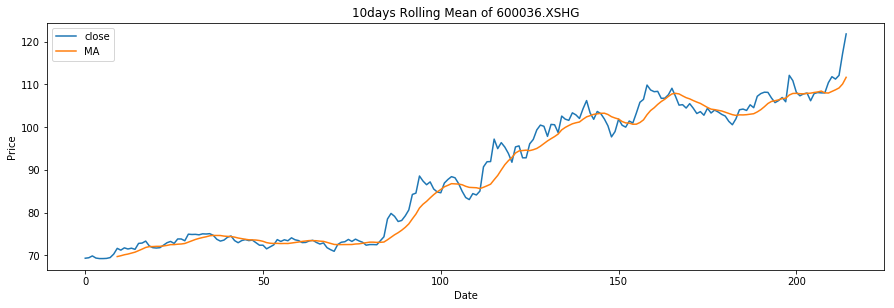

In [20]:
MA=pd.Series(ma)
rolling_mean = df['close'].rolling(window=10,center=False).mean()

plt.figure(figsize=(15, 10))
plt.subplot(211)
df['close'].plot()
rolling_mean.plot()
plt.title("10days Rolling Mean of 600036.XSHG")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(['close','MA'])
plt.show()

题目四：用talib计算50只股票的周期为5的ROCR100，生成Dataframe，并将前5只股票的 ROCR100（参数timeperiod=20）用一张图显示出来。

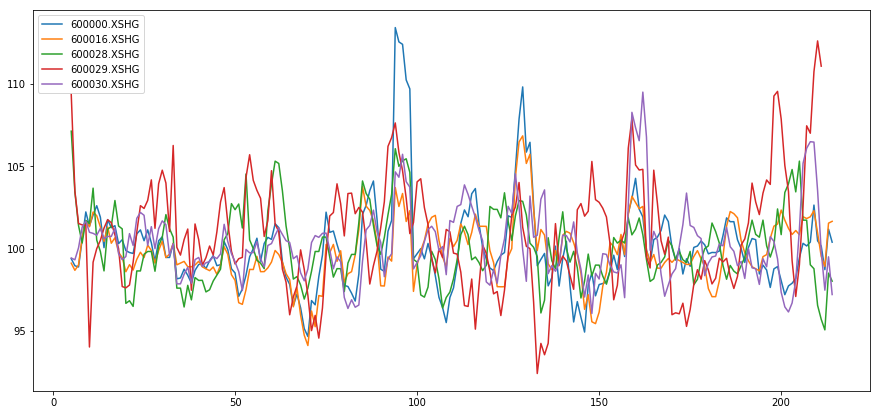

In [22]:
index=df.index
import talib as ta
data_50 = pd.DataFrame(index=index)
for i in data.keys():
    try:
        rocr = pd.DataFrame(ta.ROCR100(data[i].close.values,timeperiod=5),index=data[i].index)
        rocr.columns = [i]
        data_50 = pd.concat([data_50,rocr],axis=1)
    except:
        pass
j=0
plt.figure(figsize=(15,7))
while j<5:
    plt.plot(data_50[data_50.columns[j]])
    plt.legend()
    j+=1

In [25]:
import warnings
warnings.filterwarnings('ignore')
data_dict = {}
for s in data.keys():
    if s != '600485.XSHG':
        stock =  pd.read_excel('sz50.xlsx',sheet_name=s, index_col='datetime')
        data_dict[s] = stock.loc['2017-01-03':'2017-11-20']
PN = pd.Panel(data_dict)                

In [26]:
import talib.abstract as ta

df_ma = pd.DataFrame({name: ta.MA(value, 5) for name, value in PN.iteritems()})
pn_macd = pd.Panel({name: ta.MACD(value) for name, value in PN.iteritems()})
df_macd = pn_macd.transpose(2,1,0).to_frame().head()
print(df_macd)

                                     macd  macdsignal  macdhist
datetime            minor                                      
2017-02-24 15:00:00 600000.XSHG  0.871114    1.197907 -0.326792
                    600016.XSHG -0.007077    0.265328 -0.272405
                    600028.XSHG  0.028081    0.052015 -0.023934
                    600029.XSHG  0.221787    0.132200  0.089587
                    600030.XSHG  0.602873    0.620235 -0.017362
